<a href="https://colab.research.google.com/github/vigneshramesh1/group32-capstone/blob/joseph_svm/Models/SVM_MI_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

In [ ]:
PATH = '/content/drive/MyDrive/SER 517/Dataset/'
Dataset = pd.read_csv(PATH + 'csv_preprocessed.csv')

In [ ]:
X, y = Dataset.loc[:, Dataset.columns != 'Attack Type'], Dataset['Attack Type']

In [ ]:
print("X size:", X.shape)
print("y size:", y.shape)

X size: (1215675, 62)
y size: (1215675,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [ ]:
mi_result = mutual_info(X_train, y_train)

<Axes: >

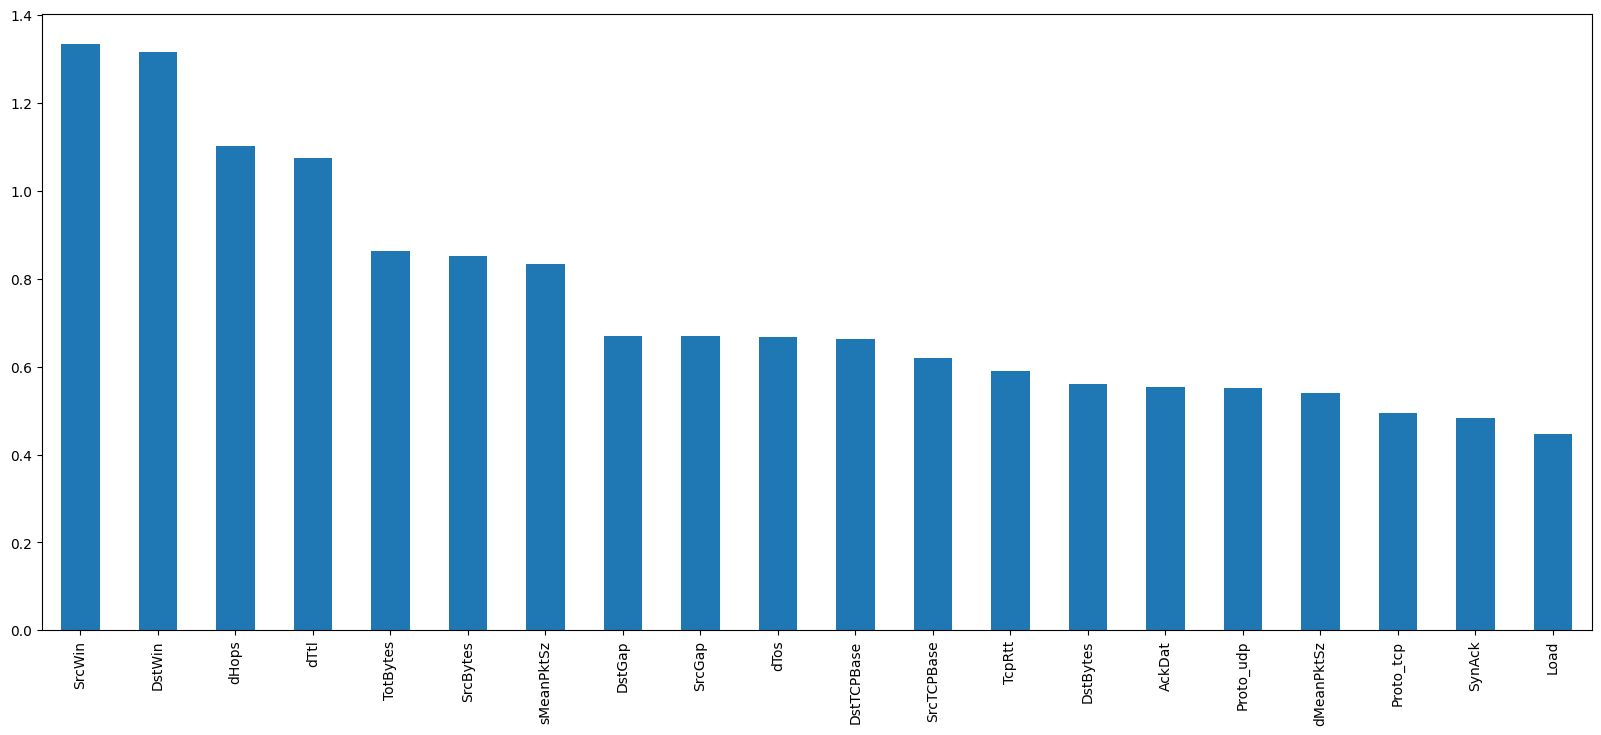

In [ ]:
mi_result.plot.bar(figsize=(20,8))

In [ ]:
X_train = X_train[mi_result.keys()]
X_test = X_test[mi_result.keys()]

In [ ]:
def pca_train_test(X_train, X_test, no_of_components):
  from sklearn.decomposition import PCA

  # Initialize PCA model
  pca = PCA(n_components=no_of_components)

  # Fit and transform the training data
  Principal_components_train = pca.fit_transform(X_train)
  column_names = ["PC " + str(i) for i in range(1, no_of_components + 1)]

  # Create a DataFrame for the training data
  train_data = pd.DataFrame(data=Principal_components_train, columns=column_names)

  # # Transform the test data using the same PCA model
  # Principal_components_test = pca.transform(X_test)

  # # Create a DataFrame for the test data
  # test_data = pd.DataFrame(data=Principal_components_test, columns=column_names)

  test_data = pca.transform(X_test)

  return train_data, test_data

In [ ]:
# X = data_MI.iloc[:, :-1]  # All rows, all columns except the last one as features
# y = data_MI['Attack Type']  # Target variable

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test = pca_train_test(X_train, X_test, 15)

In [ ]:
# Initialize and train the SVC model
svc_model = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Predictions
y_pred = svc_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.985610248310959


In [ ]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[71753     1     0     0     0     0     0     0     0]
 [    4 20286     0     0     0   983     1     0     0]
 [    0     0   191     0     0     0     0     0     0]
 [    0     0     0  1218   199     0     0     0     0]
 [    0     0     2     4  2923     0     0     0     0]
 [    0  1384     0     0    13  9490    19     0     0]
 [    0     0     2     0     5     0  3010     0     0]
 [    0     0     0     0     0     0     0 68506     0]
 [    0     0     2     0     5     0     0     0  2351]]


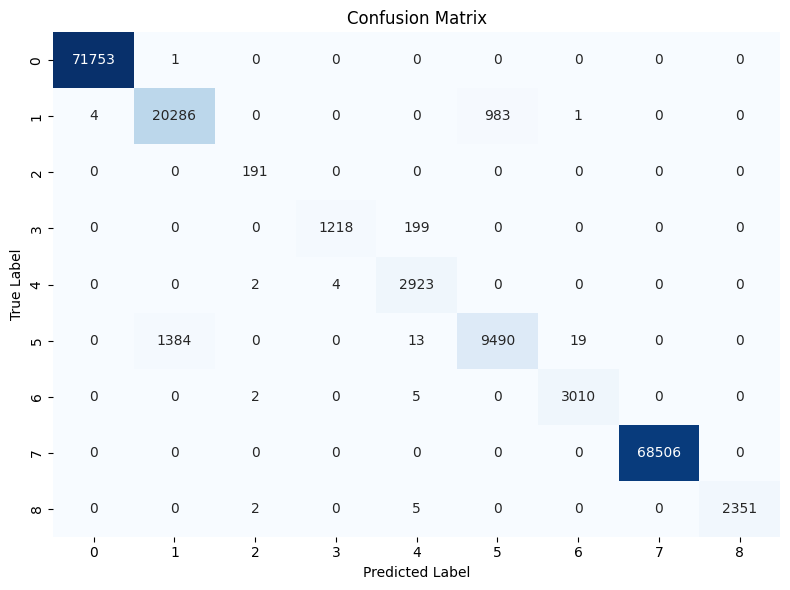

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust layout to make room for the title
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.985610248310959


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'Precision: {precision}')

Precision: 0.985608100325017


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'Recall: {recall}')


Recall: 0.985610248310959


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'F1 Score: {f1}')

F1 Score: 0.9855186596646663


<ipython-input-24-76ca1e877004>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=metric_names, palette="viridis")


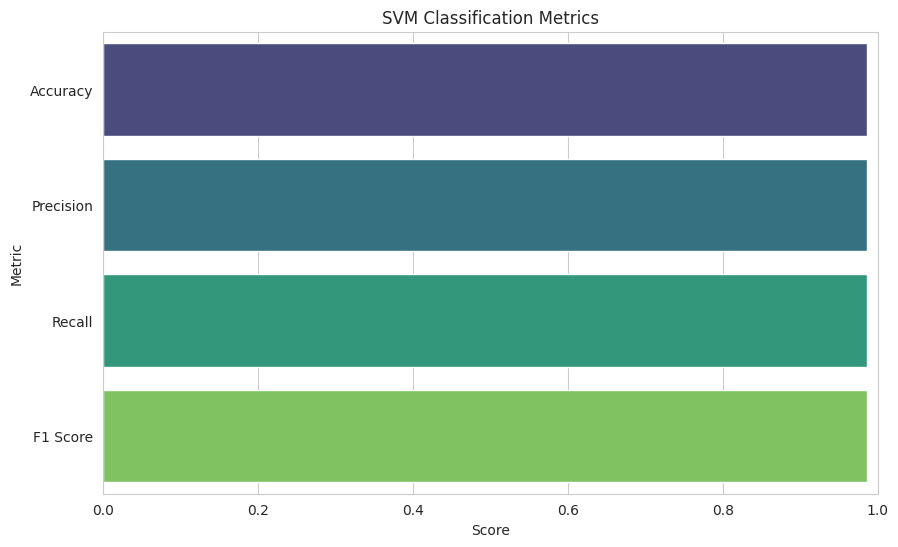

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming metrics are stored in these variables
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    # 'ROC-AUC': roc_auc  # Uncomment if ROC-AUC is applicable and calculated
}

# Convert dictionary to lists for plotting
metric_names = list(metrics.keys())
metric_values = [metrics[metric] for metric in metric_names]

# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_values, y=metric_names, palette="viridis")

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('SVM Classification Metrics')
plt.xlim(0, 1)  # Assuming the scores are between 0 and 1
plt.show()
